#### Importing Useful Libraries

In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import joblib  # For saving and loading the model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split



In [5]:
file_path = 'tesla_merged_sentiment_price.csv'
data = pd.read_csv(file_path)
print(data.head())

         Date      Close       High        Low       Open     Volume  \
0  2017-01-03  14.466000  14.688667  14.064000  14.324000   88849500   
1  2017-01-04  15.132667  15.200000  14.287333  14.316667  168202500   
2  2017-01-05  15.116667  15.165333  14.796667  15.094667   88675500   
3  2017-01-06  15.267333  15.354000  15.030000  15.128667   82918500   
4  2017-01-09  15.418667  15.461333  15.200000  15.264667   59692500   

      SMA_20     SMA_50     EMA_20     RSI_14      MACD  MACD_Signal  \
0  13.550833  13.080067  13.741187  67.673928  0.441098     0.344003   
1  13.684800  13.115933  13.873709  74.449554  0.495801     0.374362   
2  13.821133  13.147920  13.992086  74.048408  0.531733     0.405836   
3  13.940667  13.183480  14.113538  75.392984  0.565844     0.437838   
4  14.070633  13.222200  14.237836  76.698864  0.598193     0.469909   

   Positive   Neutral  Negative  Sentiment_Score  
0  0.727748  0.120549  0.151703         0.576045  
1  0.707073  0.149656  0.143271 

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [7]:
df = data[['Close', 'Sentiment_Score']].dropna().values

In [8]:
# Split original df
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

# Scale only training data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.transform(test_df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i, 0])  # assuming 'Close' is at index 0
    return np.array(X), np.array(y)

sequence_length = 60
X_train, y_train = create_sequences(scaled_train, sequence_length)
X_test, y_test = create_sequences(scaled_test, sequence_length)

In [9]:
# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

#### Defining the Model

In [10]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Chacha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(LSTM(50))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=20, shuffle=True,
          validation_split=0.1, callbacks=[early_stop], verbose=1)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0261 - val_loss: 0.0022
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0019 - val_loss: 0.0057
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0

In [13]:
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [14]:
predicted = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [15]:
# y_pred = model.predict(X_test)

In [16]:
print("Predicted shape:", predicted.shape)
print("y_test shape:", y_test.shape)

# If needed, slice y_test to match predicted
y_test_trimmed = y_test[:predicted.shape[0]]
print("y_test_trimmed shape:", y_test_trimmed.shape)

# Check reshaped dimensions
print("y_test_trimmed reshaped:", y_test_trimmed.reshape(-1, 1).shape)
print("zeros shape:", np.zeros((predicted.shape[0], 1)).shape)


Predicted shape: (323, 1)
y_test shape: (323,)
y_test_trimmed shape: (323,)
y_test_trimmed reshaped: (323, 1)
zeros shape: (323, 1)


In [17]:
# Ensure y_test is only the Close prices
y_test_trimmed = y_test[:predicted.shape[0]].reshape(-1, 1)  # Shape: (371, 1)

# Create dummy sentiment column for inverse scaling
zeros_column = np.zeros_like(y_test_trimmed)

# Stack to match scaler input shape
actual_combined = np.hstack((y_test_trimmed, zeros_column))
predicted_combined = np.hstack((predicted, zeros_column))

# Inverse scale to get original Close prices
actual_sales = scaler.inverse_transform(actual_combined)[:, 0]
predicted_sales = scaler.inverse_transform(predicted_combined)[:, 0]


In [18]:
# predicted_combined = np.hstack((predicted, np.zeros((predicted.shape[0], 1))))
# actual_combined = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))))

# # Inverse scale
# predicted_sales = scaler.inverse_transform(predicted_combined)[:, 0]
# actual_sales = scaler.inverse_transform(actual_combined)[:, 0]

In [19]:
# y_test_actual = scaler.inverse_transform(y_test)
# y_pred_actual = scaler.inverse_transform(y_pred)

In [20]:
mae = mean_absolute_error(actual_combined, predicted_combined)
mse = mean_squared_error(actual_combined, predicted_combined)
r2 = r2_score(actual_combined, predicted_combined)

In [21]:
print(f"Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Absolute Error: 0.01
Mean Squared Error: 0.00
R² Score: 0.9711


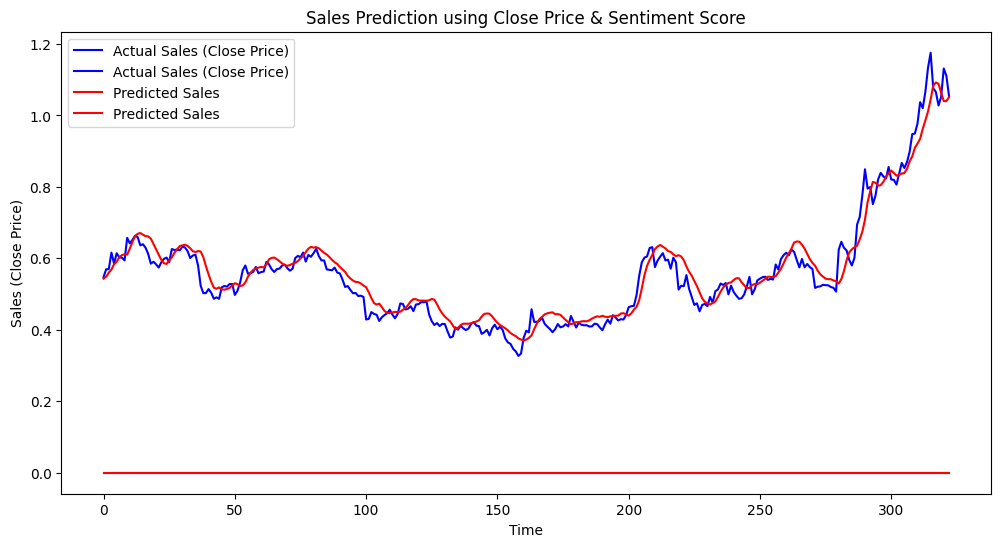

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(actual_combined, label='Actual Sales (Close Price)', color='blue')
plt.plot(predicted_combined, label='Predicted Sales', color='red')
plt.title('Sales Prediction using Close Price & Sentiment Score')
plt.xlabel('Time')
plt.ylabel('Sales (Close Price)')
plt.legend()
plt.show()

In [23]:
# plt.figure(figsize=(12,6))
# plt.plot(data['Date'][-len(y_test_actual):], y_test_actual, color='blue', label='Actual Prices')
# plt.plot(data['Date'][-len(y_test_actual):], y_pred_actual, color='red', label='Predicted Prices')
# plt.title('LSTM Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

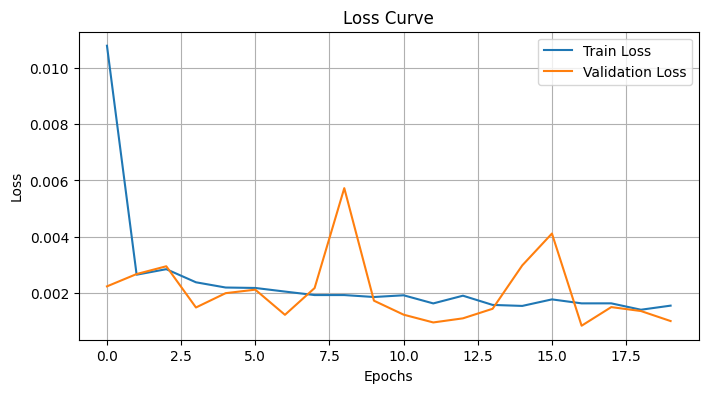

In [24]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [25]:

# Save the trained model
joblib.dump(model, 'history')
print("Model saved successfully!")


Model saved successfully!


In [27]:

# Load the model
model = joblib.load('history')
print("Model loaded successfully!")

# Example usage with new data (replace 'new_data' with actual input)
# prediction = model.predict(new_data)
# print("Prediction:", prediction)


Model loaded successfully!
